In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

In [223]:
# Before running this code:
#
# A hmmer search was performed using the y1000+ genomes
#       Build hmm profile from ygob alignment of Ino2 genes: 
#               hmmbuild <hmmprofile> <ygob_alignment>
#       Run hmm search on genomes from y1000+:
#           cat ../genome_data/y1000p_pep_files_modified/*modified.pep | hmmsearch -o War1_search.out -A War1_search.align --tblout War1_search.tsv War1.hmm -
# 
# Extract significant genes found in hmmsearch using the get_gene_names function
# 
# Get sequences for significant genes
#       while IFS=, read -r gene species; do   species=$(echo "$species" | tr -d '\r');  grep -A 1 $gene ../y1000p_pep_files_modified/${species}_modified.pep; done < war1_gene_names.csv > war1_orthologs.fasta
# 
# Use the fasta file to identify domains with: https://www.ncbi.nlm.nih.gov/Structure/bwrpsb/bwrpsb.cgi
#
# Perform a reverse blast on the identified sequences with: 
#       ncbi-blast-2.15.0+/bin/blastp -query war1_orthologs.fasta -db saccharomyces_cerevisiae.final.blastdb -evalue 0.001 -outfmt 6 > reciprocal_blast_war1.txt

In [224]:
# Used to extract gene names
def get_gene_names(in_file, out_file):
    with open(in_file, "r") as f:
        lines = f.readlines()
        
    genes = [line for line in lines if not line.startswith("#")]
    names = [gene.split()[0] for gene in genes]

    e_vals = [float(gene.split()[4]) for gene in genes]
    scores = [float(gene.split()[5]) for gene in genes]

    split_names = [name.split("_") for name in names]

    genes = [split_name[0] for split_name in split_names]
    species = ["_".join(split_name[1:]) for split_name in split_names]

    genes_species = pd.DataFrame((genes, species, e_vals, scores)).T
    genes_species.columns = ["gene","species","evalue", "scores"]
    genes_species = genes_species[genes_species["evalue"] < 0.001]

    genes_species[["gene", "species"]].to_csv(out_file, index=False, header=None)

# Extracing seq names and genes from hmmsearch

In [225]:
# Loading HMMER data
# Since War1 has multiple cerevisiae genes in the hmmsearch we will filter the genes for those that are most similar to War1
with open("/Users/claireleblanc/Documents/grad_school/staller_lab/Evolution_stuff/War1/War1_search.tsv", "r") as f:
    lines = f.readlines()
    
genes = [line for line in lines if not line.startswith("#")]
names = [gene.split()[0] for gene in genes]

e_vals = [float(gene.split()[4]) for gene in genes]
scores = [float(gene.split()[5]) for gene in genes]

split_names = [name.split("_") for name in names]

genes = [split_name[0] for split_name in split_names]
species = ["_".join(split_name[1:]) for split_name in split_names]

genes_species = pd.DataFrame((genes, species, e_vals, scores)).T
genes_species.columns = ["gene","species","evalue", "scores"]
genes_species = genes_species[genes_species["evalue"] < 0.001]
genes_species = genes_species[(genes_species["species"] != "saccharomyces_cerevisiae.sgd")]
genes_species

,gene,species,evalue,scores
0,g001087.m1,yHMPu5000034874_tetrapisispora_blattae_190924....,0.0,1389.0
2,g001268.m1,saccharomyces_cerevisiae.final,0.0,1275.3
3,g001213.m1,saccharomyces_kudriavzevii.final,0.0,1271.6
4,g001221.m1,saccharomyces_mikatae.final,0.0,1270.5
5,g001238.m1,saccharomyces_paradoxus.final,0.0,1268.3
...,...,...,...,...
3095,g003652.m1,yHMPu5000037236_blastobotrys_persicus_210305.f...,0.00099,25.9
3096,g001548.m1,yHMPu5000035278_tortispora_phaffii_170713.final,0.00099,25.9
3097,g005855.m1,yHMPu5000038082_candida_suecica_180604.final,0.00099,25.9
3098,g002906.m1,yHMPu5000035671_phaffomyces_antillensis_160613...,0.00099,25.9


In [226]:
# Loading data - Gpr1
# Gpr1 is another S cerevisiae gene that appeared in hmmer search

with open("/Users/claireleblanc/Documents/grad_school/staller_lab/Evolution_stuff/War1/Gpr1_search.tsv", "r") as f:
    lines = f.readlines()
    
genes = [line for line in lines if not line.startswith("#")]
names = [gene.split()[0] for gene in genes]

e_vals = [float(gene.split()[4]) for gene in genes]
scores = [float(gene.split()[5]) for gene in genes]

split_names = [name.split("_") for name in names]

genes = [split_name[0] for split_name in split_names]
species = ["_".join(split_name[1:]) for split_name in split_names]

gpr1_genes_species = pd.DataFrame((genes, species, e_vals, scores)).T
gpr1_genes_species.columns = ["gene","species","evalue", "scores"]
gpr1_genes_species = gpr1_genes_species[gpr1_genes_species["evalue"] < 0.001]
gpr1_genes_species = gpr1_genes_species[(gpr1_genes_species["species"] != "saccharomyces_cerevisiae.sgd")]
gpr1_genes_species

,gene,species,evalue,scores
1,g003699.m1,saccharomyces_cerevisiae.final,0.0,1239.7
2,g003580.m1,saccharomyces_kudriavzevii.final,0.0,1229.8
3,g003527.m1,saccharomyces_mikatae.final,0.0,1229.4
4,g003622.m1,saccharomyces_paradoxus.final,0.0,1212.4
5,g003637.m1,saccharomyces_uvarum.final,0.0,1212.1
...,...,...,...,...
1536,g000394.m1,yHMPu5000035031_Candida_kruisii_SPADES.final,0.000004,33.8
1537,g000945.m1,candida_psychrophila.final,0.000004,33.7
1538,g004813.m1,yHMPu5000034999_cephaloascus_fragrans_160519.f...,0.000028,31.0
1539,g003682.m1,yHMPu5000040940_metschnikowia_matae_201018.final,0.00031,27.5


In [227]:
# Loading data - Aro80 genes
# Aro80 is another S cerevisiae gene that appeared in hmmer search

with open("/Users/claireleblanc/Documents/grad_school/staller_lab/Evolution_stuff/War1/Aro80_search.tsv", "r") as f:
    lines = f.readlines()
    
genes = [line for line in lines if not line.startswith("#")]
names = [gene.split()[0] for gene in genes]

e_vals = [float(gene.split()[4]) for gene in genes]
scores = [float(gene.split()[5]) for gene in genes]

split_names = [name.split("_") for name in names]

genes = [split_name[0] for split_name in split_names]
species = ["_".join(split_name[1:]) for split_name in split_names]

aro80_genes_species = pd.DataFrame((genes, species, e_vals, scores)).T
aro80_genes_species.columns = ["gene","species","evalue", "scores"]
aro80_genes_species = aro80_genes_species[aro80_genes_species["evalue"] < 0.001]
aro80_genes_species = aro80_genes_species[(aro80_genes_species["species"] != "saccharomyces_cerevisiae.sgd")]
aro80_genes_species

,gene,species,evalue,scores
1,g004112.m1,saccharomyces_cerevisiae.final,0.0,1403.2
2,g003193.m1,saccharomyces_uvarum.final,0.0,1397.6
3,g003983.m1,saccharomyces_kudriavzevii.final,0.0,1396.0
4,g004036.m1,saccharomyces_paradoxus.final,0.0,1390.9
5,g003313.m1,saccharomyces_eubayanus.final,0.0,1389.3
...,...,...,...,...
4799,g003180.m1,yHMPu5000040959_metschnikowia_aberdeeniae_2010...,0.00099,25.7
4800,g003623.m1,yHMPu5000034877_tetrapisispora_namnaonensis_16...,0.00099,25.7
4801,g005833.m1,yHMPu5000038379_candida_lidongshanica_180604.f...,0.00099,25.7
4802,g000650.m1,yHMPu5000034903_ogataea_naganishii_160519.final,0.00099,25.7


In [228]:
# Get genes in Aro80 and War1

aro_war1_genes = aro80_genes_species.merge(genes_species, on = ["gene", "species"])
aro_war1_genes.columns = ["genes", "species", "evalue_aro80", "score_aro80", "evalue_war1", "score_war1"]
aro_war1_genes

,genes,species,evalue_aro80,score_aro80,evalue_war1,score_war1
0,g004112.m1,saccharomyces_cerevisiae.final,0.0,1403.2,0.00055,26.8
1,g003313.m1,saccharomyces_eubayanus.final,0.0,1389.3,0.00056,26.7
2,g001663.m1,saccharomyces_arboricola.final,0.0,1377.6,0.00007,29.7
3,g003689.m1,saccharomyces_jurei.final,0.0,1361.3,0.0002,28.2
4,g003023.m1,yHAB137_kazachstania_africana_160519.final,0.0,1356.3,0.00072,26.4
...,...,...,...,...,...,...
1431,g006491.m1,yHMPu5000034594_Starmera_quercuum_p31_SPADES.f...,0.00094,25.8,0.0,185.7
1432,g004091.m1,yarrowia_lipolytica.final,0.00094,25.8,0.0,146.4
1433,g005921.m1,yHMPu5000035647_yarrowia_lipolytica_160519.hap...,0.00094,25.8,0.0,146.4
1434,g004865.m1,yHMPu5000035244_candida_incommunis_160928.final,0.00097,25.8,0.0,127.4


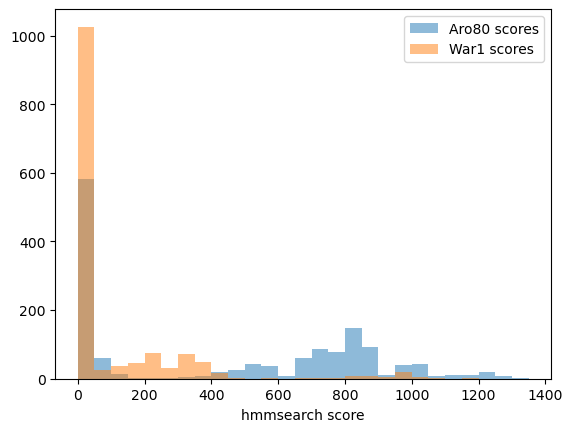

In [229]:
# Look at score distributions
plt.hist(aro_war1_genes["score_aro80"], bins=np.arange(0,1400,50), label="Aro80 scores", alpha=0.5)
plt.hist(aro_war1_genes["score_war1"], bins=np.arange(0,1400,50), label="War1 scores", alpha=0.5)
plt.xlabel("hmmsearch score")
plt.legend()

Text(0, 0.5, 'War1 score')

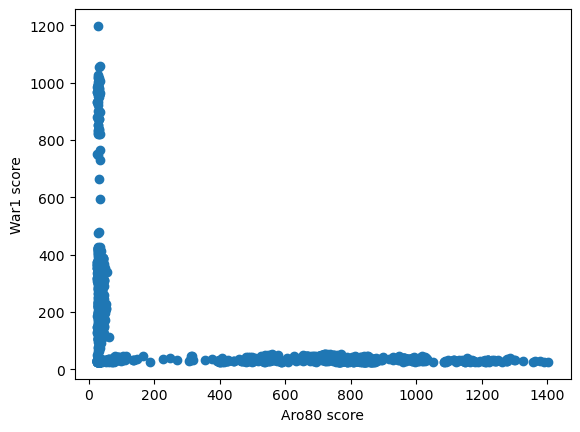

In [230]:
# Scatter plot of War1 and Aro80 scores

plt.scatter(aro_war1_genes["score_aro80"], aro_war1_genes["score_war1"])
plt.xlabel("Aro80 score")
plt.ylabel("War1 score")

In [231]:
# Filter out genes that are more common in Aro80 than War1
filter_out_genes = aro_war1_genes[(aro_war1_genes["score_aro80"] > aro_war1_genes["score_war1"])]

In [232]:
# The candida_albicans.cgd is duplicate of candida_albicans.final 
# and sequences gets truncated due to different fasta format so we filter out
no_gd_genes_species = genes_species[["candida_albicans.cgd" not in s for s in genes_species["species"]]]
no_gd_genes_species

,gene,species,evalue,scores
0,g001087.m1,yHMPu5000034874_tetrapisispora_blattae_190924....,0.0,1389.0
2,g001268.m1,saccharomyces_cerevisiae.final,0.0,1275.3
3,g001213.m1,saccharomyces_kudriavzevii.final,0.0,1271.6
4,g001221.m1,saccharomyces_mikatae.final,0.0,1270.5
5,g001238.m1,saccharomyces_paradoxus.final,0.0,1268.3
...,...,...,...,...
3095,g003652.m1,yHMPu5000037236_blastobotrys_persicus_210305.f...,0.00099,25.9
3096,g001548.m1,yHMPu5000035278_tortispora_phaffii_170713.final,0.00099,25.9
3097,g005855.m1,yHMPu5000038082_candida_suecica_180604.final,0.00099,25.9
3098,g002906.m1,yHMPu5000035671_phaffomyces_antillensis_160613...,0.00099,25.9


Text(0.5, 0, 'Number of War1 orthologs identified in hmmsearch')

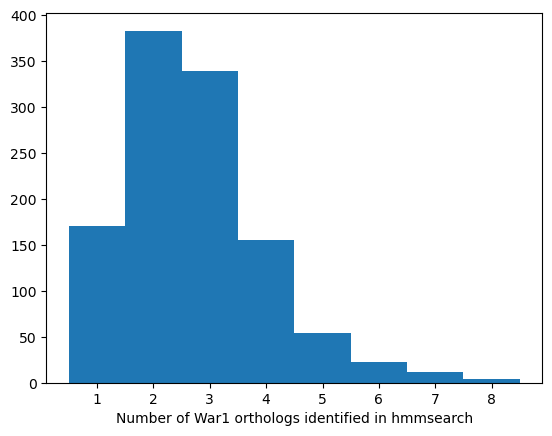

In [233]:
# Visualize genes per species
plt.hist(genes_species["species"].value_counts(), bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5])
plt.xlabel("Number of War1 orthologs identified in hmmsearch")

In [234]:
# Extract sequences, then search for zinc finger domains
no_gd_genes_species[["gene", "species"]].to_csv("../War1/War1_gene_names.csv", index=False)

In [235]:
# Genes that were more similar to Aro80
filter_out_genes["name"] = filter_out_genes["genes"] + "_" + filter_out_genes["species"]
filter_out_genes

/var/folders/1z/f_dq1cxs02n4k3c48p54y62w0000gn/T/ipykernel_95038/1179264208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_out_genes["name"] = filter_out_genes["genes"] + "_" + filter_out_genes["species"]


,genes,species,evalue_aro80,score_aro80,evalue_war1,score_war1,name
0,g004112.m1,saccharomyces_cerevisiae.final,0.0,1403.2,0.00055,26.8,g004112.m1_saccharomyces_cerevisiae.final
1,g003313.m1,saccharomyces_eubayanus.final,0.0,1389.3,0.00056,26.7,g003313.m1_saccharomyces_eubayanus.final
2,g001663.m1,saccharomyces_arboricola.final,0.0,1377.6,0.00007,29.7,g001663.m1_saccharomyces_arboricola.final
3,g003689.m1,saccharomyces_jurei.final,0.0,1361.3,0.0002,28.2,g003689.m1_saccharomyces_jurei.final
4,g003023.m1,yHAB137_kazachstania_africana_160519.final,0.0,1356.3,0.00072,26.4,g003023.m1_yHAB137_kazachstania_africana_16051...
...,...,...,...,...,...,...,...
1302,g002752.m1,yHMPu5000038089_candida_pseudoaaseri_170912.final,0.00031,27.4,0.00037,27.3,g002752.m1_yHMPu5000038089_candida_pseudoaaser...
1303,g004627.m1,yHMPu5000034885_ogataea_zsoltii_160519.final,0.00031,27.4,0.00047,27.0,g004627.m1_yHMPu5000034885_ogataea_zsoltii_160...
1315,g001530.m1,yHMPu5000041834_candida_taylori_170912.final,0.00035,27.2,0.00084,26.2,g001530.m1_yHMPu5000041834_candida_taylori_170...
1321,g003527.m1,yHMPu5000038088_candida_potachaoreniae_180604....,0.00037,27.1,0.00061,26.6,g003527.m1_yHMPu5000038088_candida_potachaoren...


# Filter based on blast

In [236]:
# Read in blast data
blast_hits = pd.read_table("../War1/reciprocal_blast_war1.txt", header=None)
blast_hits.columns = ["gene_species_name", "blast_hit_gene_name","percent_identical", "alignment_length","num_mismatch","num_gaps","start_of_align_query","end_of_align_query","start_of_align_subj","end_of_align_subj","evalue","bitscore"]
blast_hits

,gene_species_name,blast_hit_gene_name,percent_identical,alignment_length,num_mismatch,num_gaps,start_of_align_query,end_of_align_query,start_of_align_subj,end_of_align_subj,evalue,bitscore
0,g001087.m1_yHMPu5000034874_tetrapisispora_blat...,g001268.m1,38.941,850,413,19,607,1434,178,943,3.240000e-171,535.0
1,g001087.m1_yHMPu5000034874_tetrapisispora_blat...,g001268.m1,55.714,140,54,2,304,441,37,170,9.170000e-36,145.0
2,g001087.m1_yHMPu5000034874_tetrapisispora_blat...,g001196.m1,34.328,67,36,4,337,401,31,91,6.000000e-03,38.9
3,g001087.m1_yHMPu5000034874_tetrapisispora_blat...,g002498.m1,31.250,64,37,2,338,401,20,76,3.600000e-02,36.2
4,g001087.m1_yHMPu5000034874_tetrapisispora_blat...,g004112.m1,34.694,49,31,1,337,384,18,66,4.500000e-02,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
52129,g000764.m1_arxula_adeninivorans.final,g001001.m1,29.268,41,26,1,6,46,38,75,1.800000e-02,36.2
52130,g000764.m1_arxula_adeninivorans.final,g001605.m1,33.333,87,47,5,11,92,69,149,1.900000e-02,36.2
52131,g000764.m1_arxula_adeninivorans.final,g000103.m1,28.070,57,39,1,253,309,271,325,2.200000e-02,36.2
52132,g000764.m1_arxula_adeninivorans.final,g001268.m1,36.735,49,27,2,10,55,74,121,2.600000e-02,35.8


Text(0.5, 0, 'Number of blast hits per gene')

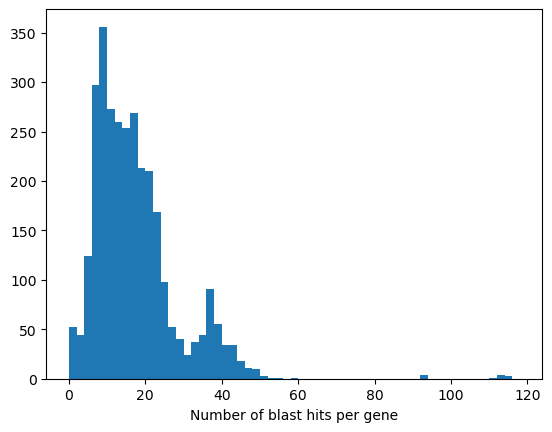

In [237]:
plt.hist(blast_hits["gene_species_name"].value_counts(), bins=np.arange(0,120,2))
plt.xlabel("Number of blast hits per gene")

In [238]:
# Sorts first on species, then on evalue (smallest first)
blast_hits = blast_hits.sort_values(["gene_species_name", "evalue"])

# Only keep the most significant blast hit
top_blast_hit = blast_hits.drop_duplicates("gene_species_name", keep="first")
top_blast_hit

,gene_species_name,blast_hit_gene_name,percent_identical,alignment_length,num_mismatch,num_gaps,start_of_align_query,end_of_align_query,start_of_align_subj,end_of_align_subj,evalue,bitscore
7035,g000004.m1_yHMPu5000035639_wickerhamomyces_can...,g001268.m1,25.718,731,371,27,14,591,64,775,2.760000e-43,166.0
22912,g000005.m1_yHMPu5000041788_scheffersomyces_coi...,g003019.m1,23.476,328,198,10,153,439,380,695,2.800000e-15,77.4
3325,g000006.m1_yHMPu5000026270_Candida_sp._SPAdes....,g001268.m1,25.464,754,436,28,34,706,69,777,1.210000e-50,191.0
10046,g000006.m1_yHMPu5000026296_candida_bombi_18060...,g001268.m1,20.849,518,336,19,130,609,346,827,6.420000e-14,73.6
1132,g000006.m1_yHMPu5000041850_candida_lyxosophila...,g001268.m1,30.020,493,307,13,314,772,300,788,1.910000e-61,224.0
...,...,...,...,...,...,...,...,...,...,...,...,...
22356,g013379.m1_yHMPu5000034630_Magnusiomyces_magnu...,g004112.m1,43.162,234,118,4,297,528,235,455,1.820000e-52,195.0
29676,g013611.m1_yHMPu5000035269_wickerhamomyces_cif...,g001196.m1,41.997,731,300,18,205,841,183,883,2.760000e-169,513.0
10295,g014421.m1_yHMPu5000034630_Magnusiomyces_magnu...,g001268.m1,21.978,273,174,10,2,248,537,796,7.500000e-08,53.1
21751,g015571.m1_yHMPu5000034630_Magnusiomyces_magnu...,g004112.m1,41.909,241,109,4,339,579,235,444,6.700000e-52,189.0


In [239]:
# Top genes
top_blast_hit[["cerevisiae" in name for name in top_blast_hit["gene_species_name"]]]

,gene_species_name,blast_hit_gene_name,percent_identical,alignment_length,num_mismatch,num_gaps,start_of_align_query,end_of_align_query,start_of_align_subj,end_of_align_subj,evalue,bitscore
5,g001268.m1_saccharomyces_cerevisiae.final,g001268.m1,100.0,944,0,0,1,944,1,944,0.0,1955.0
16982,g003699.m1_saccharomyces_cerevisiae.final,g003699.m1,100.0,961,0,0,1,961,1,961,0.0,1971.0
47013,g004112.m1_saccharomyces_cerevisiae.final,g004112.m1,100.0,950,0,0,1,950,1,950,0.0,1964.0


In [240]:
# Filter for genes with top blast hit to war1
top_blast_hit_war1 = top_blast_hit[top_blast_hit["blast_hit_gene_name"] == "g001268.m1"]
top_blast_hit_war1

,gene_species_name,blast_hit_gene_name,percent_identical,alignment_length,num_mismatch,num_gaps,start_of_align_query,end_of_align_query,start_of_align_subj,end_of_align_subj,evalue,bitscore
7035,g000004.m1_yHMPu5000035639_wickerhamomyces_can...,g001268.m1,25.718,731,371,27,14,591,64,775,2.760000e-43,166.0
3325,g000006.m1_yHMPu5000026270_Candida_sp._SPAdes....,g001268.m1,25.464,754,436,28,34,706,69,777,1.210000e-50,191.0
10046,g000006.m1_yHMPu5000026296_candida_bombi_18060...,g001268.m1,20.849,518,336,19,130,609,346,827,6.420000e-14,73.6
1132,g000006.m1_yHMPu5000041850_candida_lyxosophila...,g001268.m1,30.020,493,307,13,314,772,300,788,1.910000e-61,224.0
523,g000020.m1_yHMPu5000034875_tetrapisispora_flee...,g001268.m1,35.306,980,494,18,9,930,43,940,3.020000e-179,541.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10456,g009370.m1_yHMPu5000041803_Metschnikowia_zizyp...,g001268.m1,40.984,61,34,2,24,83,66,125,5.580000e-06,44.7
9000,g009752.m1_yHMPu5000034666_blastobotrys_terres...,g001268.m1,24.586,362,243,8,1,357,606,942,2.000000e-22,97.1
5713,g012352.m1_yHMPu5000038388_candida_inconspicua...,g001268.m1,26.577,444,292,13,288,706,339,773,4.170000e-36,145.0
8873,g012923.m1_yHMPu5000035269_wickerhamomyces_cif...,g001268.m1,25.282,443,222,17,227,571,344,775,5.040000e-23,102.0


In [241]:
# Merge blast df with gene names
no_gd_genes_species["gene_species_name"] = no_gd_genes_species["gene"] + "_" + no_gd_genes_species["species"]
filtered_genes = no_gd_genes_species.merge(top_blast_hit_war1, on="gene_species_name")

/var/folders/1z/f_dq1cxs02n4k3c48p54y62w0000gn/T/ipykernel_95038/3488746727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_gd_genes_species["gene_species_name"] = no_gd_genes_species["gene"] + "_" + no_gd_genes_species["species"]


# Filtering based on PFAM domains

In [242]:
all_lines = []

# Read in domain files
for i in range(1,5):
    domain_file = f"/Users/claireleblanc/Documents/grad_school/staller_lab/Evolution_stuff/War1/War1_domains_{i}.txt"
    with open(domain_file, "r") as f:
        lines = f.readlines()

    lines = [line.strip().split('\t') for line in lines if not line.startswith("#")]
    all_lines = all_lines + (lines[2:])

domains = pd.DataFrame(all_lines, columns=lines[1])
domains["name"] = [s.split('>')[-1] for s in domains["Query"]]
domains

,Query,Hit type,PSSM-ID,From,To,E-Value,Bitscore,Accession,Short name,Incomplete,Superfamily,name
0,Q#1 - >g001087.m1_yHMPu5000034874_tetrapisispo...,specific,238023,338,379,6.11367e-07,46.8877,cd00067,GAL4,-,cl00068,g001087.m1_yHMPu5000034874_tetrapisispora_blat...
1,Q#1 - >g001087.m1_yHMPu5000034874_tetrapisispo...,superfamily,425404,399,573,0.00190011,42.6061,cl41773,SP1-4_N superfamily,C,-,g001087.m1_yHMPu5000034874_tetrapisispora_blat...
2,Q#1 - >g001087.m1_yHMPu5000034874_tetrapisispo...,superfamily,481241,529,735,0.00367581,41.8721,cl46901,PRK12323 superfamily,N,-,g001087.m1_yHMPu5000034874_tetrapisispora_blat...
3,Q#2 - >g001268.m1_saccharomyces_cerevisiae.final,specific,214501,70,118,3.78591e-08,50.051,smart00066,GAL4,-,cl00068,g001268.m1_saccharomyces_cerevisiae.final
4,Q#3 - >g001213.m1_saccharomyces_kudriavzevii.f...,specific,214501,69,117,1.12908e-08,51.5918,smart00066,GAL4,-,cl00068,g001213.m1_saccharomyces_kudriavzevii.final
...,...,...,...,...,...,...,...,...,...,...,...,...
5463,Q#95 - >g005855.m1_yHMPu5000038082_candida_sue...,specific,214501,88,133,8.30597e-10,55.0586,smart00066,GAL4,-,cl00068,g005855.m1_yHMPu5000038082_candida_suecica_180...
5464,Q#96 - >g002906.m1_yHMPu5000035671_phaffomyces...,specific,213391,201,567,2.66675e-44,165.31,cd12148,fungal_TF_MHR,-,cl23766,g002906.m1_yHMPu5000035671_phaffomyces_antille...
5465,Q#96 - >g002906.m1_yHMPu5000035671_phaffomyces...,specific,238023,32,68,1.03808e-10,57.2881,cd00067,GAL4,-,cl00068,g002906.m1_yHMPu5000035671_phaffomyces_antille...
5466,Q#97 - >g000764.m1_arxula_adeninivorans.final,specific,213391,176,560,1.25719e-12,70.5512,cd12148,fungal_TF_MHR,-,cl23766,g000764.m1_arxula_adeninivorans.final


In [243]:
domains[["saccharomyces_cerevisiae" in s for s in domains["name"]]]

# g001268.m1 is War1
# g003699.m1 is GPR1 --> G protein coupled receptor
# g004112.m1 is ARO80 --> Transcriptional activation of Zn2Cys6 family, activates transcription of aromatic amino aid catabolic genes

,Query,Hit type,PSSM-ID,From,To,E-Value,Bitscore,Accession,Short name,Incomplete,Superfamily,name
3,Q#2 - >g001268.m1_saccharomyces_cerevisiae.final,specific,214501,70,118,3.78591e-08,50.051,smart00066,GAL4,-,cl00068,g001268.m1_saccharomyces_cerevisiae.final
2502,Q#485 - >g003699.m1_saccharomyces_cerevisiae.f...,specific,371685,52,279,8.22526e-106,326.942,pfam11710,Git3,-,cl28897,g003699.m1_saccharomyces_cerevisiae.final
2503,Q#485 - >g003699.m1_saccharomyces_cerevisiae.f...,specific,371826,610,685,2.44908e-38,137.085,pfam11970,GPR_Gpa2_C,-,cl13416,g003699.m1_saccharomyces_cerevisiae.final
5076,Q#884 - >g004112.m1_saccharomyces_cerevisiae.f...,specific,214501,19,64,4.81692e-11,58.5254,smart00066,GAL4,-,cl00068,g004112.m1_saccharomyces_cerevisiae.final
5077,Q#884 - >g004112.m1_saccharomyces_cerevisiae.f...,specific,213391,238,412,1.02918e-06,52.0617,cd12148,fungal_TF_MHR,C,cl23766,g004112.m1_saccharomyces_cerevisiae.final


In [244]:
# Look at top domains
domains["Short name"].value_counts()

# Top domains: fungal zinc cluster transcription factors that contain an N-terminal GAL4-like C6 zin binuclear cluster DNA-binding domain
# GAL4 --> 
# fungal_TF_MHR -->  middle homology region
# Zn_clus

Short name
GAL4                         2964
fungal_TF_MHR                1999
Atrophin-1 superfamily         48
fungal_TF_MHR superfamily      48
Zn_clus                        30
                             ... 
NPR3                            1
PRK12727 superfamily            1
PTZ00341 superfamily            1
PLN03113 superfamily            1
Glyco_hydro_76                  1
Name: count, Length: 165, dtype: int64

In [245]:
# Filter for domains
dna_binding_domain = domains[domains["Short name"] == "GAL4"]
# linker = domains[domains["Short name"] == "fungal_TF_MHR"]

In [246]:
genes_species["name"] = genes_species["gene"] + "_" + genes_species["species"]
dna_binding_domain = genes_species.merge(dna_binding_domain, on="name")

In [247]:
# Filter for genes that have the DBD and are not Aro genes
dna_binding_domain_no_aro = dna_binding_domain[[s not in set(filter_out_genes["name"]) for s in dna_binding_domain["name"]]]
dna_binding_domain_no_aro

,gene,species,evalue,scores,name,Query,Hit type,PSSM-ID,From,To,E-Value,Bitscore,Accession,Short name,Incomplete,Superfamily
0,g001087.m1,yHMPu5000034874_tetrapisispora_blattae_190924....,0.0,1389.0,g001087.m1_yHMPu5000034874_tetrapisispora_blat...,Q#1 - >g001087.m1_yHMPu5000034874_tetrapisispo...,specific,238023,338,379,6.11367e-07,46.8877,cd00067,GAL4,-,cl00068
1,g001268.m1,saccharomyces_cerevisiae.final,0.0,1275.3,g001268.m1_saccharomyces_cerevisiae.final,Q#2 - >g001268.m1_saccharomyces_cerevisiae.final,specific,214501,70,118,3.78591e-08,50.051,smart00066,GAL4,-,cl00068
2,g001213.m1,saccharomyces_kudriavzevii.final,0.0,1271.6,g001213.m1_saccharomyces_kudriavzevii.final,Q#3 - >g001213.m1_saccharomyces_kudriavzevii.f...,specific,214501,69,117,1.12908e-08,51.5918,smart00066,GAL4,-,cl00068
3,g001221.m1,saccharomyces_mikatae.final,0.0,1270.5,g001221.m1_saccharomyces_mikatae.final,Q#4 - >g001221.m1_saccharomyces_mikatae.final,specific,214501,69,117,7.15682e-08,49.2806,smart00066,GAL4,-,cl00068
4,g001238.m1,saccharomyces_paradoxus.final,0.0,1268.3,g001238.m1_saccharomyces_paradoxus.final,Q#5 - >g001238.m1_saccharomyces_paradoxus.final,specific,214501,70,118,4.93216e-08,49.6658,smart00066,GAL4,-,cl00068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2958,g004592.m1,yHMPu5000034642_candida_zeylanoides_160519.final,0.00098,25.9,g004592.m1_yHMPu5000034642_candida_zeylanoides...,Q#92 - >g004592.m1_yHMPu5000034642_candida_zey...,specific,214501,69,114,2.01004e-10,56.5994,smart00066,GAL4,-,cl00068
2959,g003652.m1,yHMPu5000037236_blastobotrys_persicus_210305.f...,0.00099,25.9,g003652.m1_yHMPu5000037236_blastobotrys_persic...,Q#93 - >g003652.m1_yHMPu5000037236_blastobotry...,specific,238023,16,52,8.42349e-09,51.1249,cd00067,GAL4,-,cl00068
2960,g001548.m1,yHMPu5000035278_tortispora_phaffii_170713.final,0.00099,25.9,g001548.m1_yHMPu5000035278_tortispora_phaffii_...,Q#94 - >g001548.m1_yHMPu5000035278_tortispora_...,specific,214501,35,76,3.73707e-11,57.755,smart00066,GAL4,-,cl00068
2961,g005855.m1,yHMPu5000038082_candida_suecica_180604.final,0.00099,25.9,g005855.m1_yHMPu5000038082_candida_suecica_180...,Q#95 - >g005855.m1_yHMPu5000038082_candida_sue...,specific,214501,88,133,8.30597e-10,55.0586,smart00066,GAL4,-,cl00068


In [248]:
# dbd_no_linker = dna_binding_domain[[s in set(dna_binding_domain["name"]).difference(set(linker["name"])) for s in dna_binding_domain["name"]]]
# dbd_no_linker.drop_duplicates()

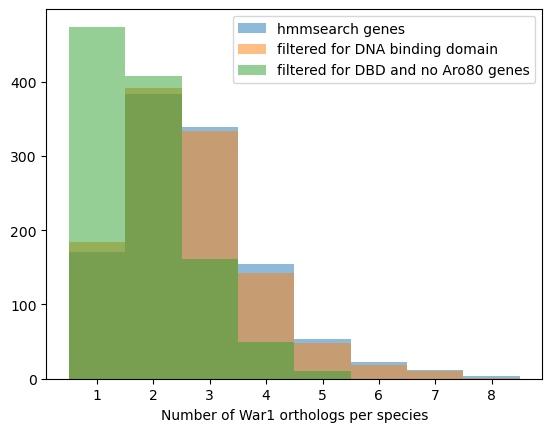

In [249]:
# Visualize genes per species
plt.hist(genes_species["species"].value_counts(), bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5], label="hmmsearch genes", alpha=0.5)
plt.hist(dna_binding_domain["species"].value_counts(), bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5], label="filtered for DNA binding domain", alpha=0.5)
# plt.hist(dbd_no_linker["species"].value_counts(), label="filtered for DBD and no linker", bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5], alpha=0.5)
plt.hist(dna_binding_domain_no_aro["species"].value_counts(), label="filtered for DBD and no Aro80 genes", bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5], alpha=0.5)
plt.xlabel("Number of War1 orthologs per species")
plt.legend()

In [250]:
# Filtering for DBD and blast hits
dbd_blast = dna_binding_domain.merge(top_blast_hit_war1, left_on="name", right_on="gene_species_name")

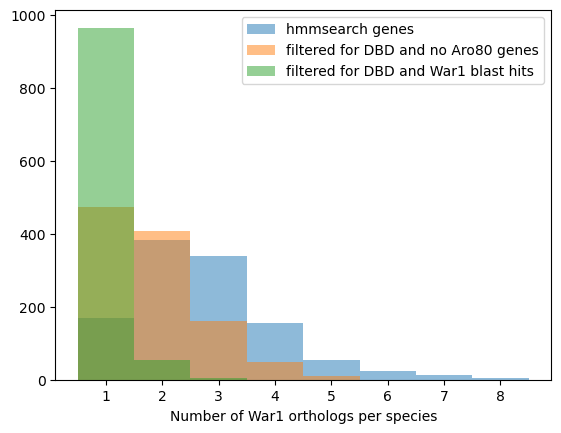

In [251]:
# Visualizing genes per species
plt.hist(genes_species["species"].value_counts(), bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5], label="hmmsearch genes", alpha=0.5)
plt.hist(dna_binding_domain_no_aro["species"].value_counts(), label="filtered for DBD and no Aro80 genes", bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5], alpha=0.5)
plt.hist(dbd_blast["species"].value_counts(), label="filtered for DBD and War1 blast hits", bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5], alpha=0.5)
plt.xlabel("Number of War1 orthologs per species")
plt.legend()

In [252]:
dbd_blast[['name', 'gene', 'species']].to_csv("../War1/War1_orthologs_blast_filtered.csv")

# Getting sequences for the domain-containing genes

In [253]:
import os
os.getcwd()

'/Users/claireleblanc/Documents/grad_school/staller_lab/Evolution_stuff/gcn4_paper_stuff'

In [254]:
# Loading sequences
seqs = []
names = []
sequence = ""

seq_file = f"../War1/War1_orthologs.fasta"
with open(seq_file, "r") as f:
    lines = f.readlines()

for j, line in enumerate(lines): 
    if line.startswith(">"):
        names.append(line.strip().replace(">",""))
        if len(sequence) > 0: 
            seqs.append(sequence)
        sequence = ""
    else:
        sequence += line.strip()
seqs.append(sequence)
sequence = ""


ortholog_seqs = pd.DataFrame({"name" : names, "aa_seq" : seqs})
ortholog_seqs["Length"] = [len(s) for s in ortholog_seqs["aa_seq"]]

In [255]:
# Merge with sequence domain
dna_binding_domain = ortholog_seqs.merge(dna_binding_domain, on="name")
dna_binding_domain

,name,aa_seq,Length,gene,species,evalue,scores,Query,Hit type,PSSM-ID,From,To,E-Value,Bitscore,Accession,Short name,Incomplete,Superfamily
0,g001087.m1_yHMPu5000034874_tetrapisispora_blat...,MSNQPMEGDIGDSNDNDSNSTISATTTSGVDTPGNSSLTSTNTNRN...,1435,g001087.m1,yHMPu5000034874_tetrapisispora_blattae_190924....,0.0,1389.0,Q#1 - >g001087.m1_yHMPu5000034874_tetrapisispo...,specific,238023,338,379,6.11367e-07,46.8877,cd00067,GAL4,-,cl00068
1,g001268.m1_saccharomyces_cerevisiae.final,MDTQIAITGVAVGKEINNDNSKTDQKVSLPKADVPCIDKATQTIIE...,944,g001268.m1,saccharomyces_cerevisiae.final,0.0,1275.3,Q#2 - >g001268.m1_saccharomyces_cerevisiae.final,specific,214501,70,118,3.78591e-08,50.051,smart00066,GAL4,-,cl00068
2,g001213.m1_saccharomyces_kudriavzevii.final,MNIQFAAAGGTIGKEVNGSSKADEEMSLPKADEPYIDKATQTIIEG...,939,g001213.m1,saccharomyces_kudriavzevii.final,0.0,1271.6,Q#3 - >g001213.m1_saccharomyces_kudriavzevii.f...,specific,214501,69,117,1.12908e-08,51.5918,smart00066,GAL4,-,cl00068
3,g001221.m1_saccharomyces_mikatae.final,MDTQIGITGAAIEKEINGISEADKNIASPKADDPYVDKATQTIIEG...,944,g001221.m1,saccharomyces_mikatae.final,0.0,1270.5,Q#4 - >g001221.m1_saccharomyces_mikatae.final,specific,214501,69,117,7.15682e-08,49.2806,smart00066,GAL4,-,cl00068
4,g001238.m1_saccharomyces_paradoxus.final,MDTQIAITGTAIGKEINKSSSKTDNKIASSNADVPCIDKATQTIIE...,944,g001238.m1,saccharomyces_paradoxus.final,0.0,1268.3,Q#5 - >g001238.m1_saccharomyces_paradoxus.final,specific,214501,70,118,4.93216e-08,49.6658,smart00066,GAL4,-,cl00068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959,g003652.m1_yHMPu5000037236_blastobotrys_persic...,MASGIVSRKRRQKFNRASKACTTCRAKKLRCDAIKKFPGSCTRCLK...,570,g003652.m1,yHMPu5000037236_blastobotrys_persicus_210305.f...,0.00099,25.9,Q#93 - >g003652.m1_yHMPu5000037236_blastobotry...,specific,238023,16,52,8.42349e-09,51.1249,cd00067,GAL4,-,cl00068
2960,g001548.m1_yHMPu5000035278_tortispora_phaffii_...,MGASLHHSHLNDSAPGSPAVGHGHGHHPPHELPRRRVGKACDCCRI...,434,g001548.m1,yHMPu5000035278_tortispora_phaffii_170713.final,0.00099,25.9,Q#94 - >g001548.m1_yHMPu5000035278_tortispora_...,specific,214501,35,76,3.73707e-11,57.755,smart00066,GAL4,-,cl00068
2961,g005855.m1_yHMPu5000038082_candida_suecica_180...,MEKLKIKSILPKPSPMSYGNGSIASTQSGSNVSTPVLATLSALKRK...,961,g005855.m1,yHMPu5000038082_candida_suecica_180604.final,0.00099,25.9,Q#95 - >g005855.m1_yHMPu5000038082_candida_sue...,specific,214501,88,133,8.30597e-10,55.0586,smart00066,GAL4,-,cl00068
2962,g002906.m1_yHMPu5000035671_phaffomyces_antille...,MTDVSEVKNEINAAGKPLATDKKYSVKFKRNRSSRACEVCHSRKVR...,859,g002906.m1,yHMPu5000035671_phaffomyces_antillensis_160613...,0.00099,25.9,Q#96 - >g002906.m1_yHMPu5000035671_phaffomyces...,specific,238023,32,68,1.03808e-10,57.2881,cd00067,GAL4,-,cl00068


In [256]:
# dbd_no_linker = ortholog_seqs.merge(dbd_no_linker, on="name")
# dbd_no_linker

In [257]:
# DBD and blast merged with sequences
dna_binding_domain_blast = ortholog_seqs.merge(dbd_blast, on="name")
dna_binding_domain_blast

,name,aa_seq,Length,gene,species,evalue_x,scores,Query,Hit type,PSSM-ID,...,percent_identical,alignment_length,num_mismatch,num_gaps,start_of_align_query,end_of_align_query,start_of_align_subj,end_of_align_subj,evalue_y,bitscore
0,g001087.m1_yHMPu5000034874_tetrapisispora_blat...,MSNQPMEGDIGDSNDNDSNSTISATTTSGVDTPGNSSLTSTNTNRN...,1435,g001087.m1,yHMPu5000034874_tetrapisispora_blattae_190924....,0.0,1389.0,Q#1 - >g001087.m1_yHMPu5000034874_tetrapisispo...,specific,238023,...,38.941,850,413,19,607,1434,178,943,3.240000e-171,535.0
1,g001268.m1_saccharomyces_cerevisiae.final,MDTQIAITGVAVGKEINNDNSKTDQKVSLPKADVPCIDKATQTIIE...,944,g001268.m1,saccharomyces_cerevisiae.final,0.0,1275.3,Q#2 - >g001268.m1_saccharomyces_cerevisiae.final,specific,214501,...,100.000,944,0,0,1,944,1,944,0.000000e+00,1955.0
2,g001213.m1_saccharomyces_kudriavzevii.final,MNIQFAAAGGTIGKEVNGSSKADEEMSLPKADEPYIDKATQTIIEG...,939,g001213.m1,saccharomyces_kudriavzevii.final,0.0,1271.6,Q#3 - >g001213.m1_saccharomyces_kudriavzevii.f...,specific,214501,...,83.175,945,152,4,1,939,1,944,0.000000e+00,1630.0
3,g001221.m1_saccharomyces_mikatae.final,MDTQIGITGAAIEKEINGISEADKNIASPKADDPYVDKATQTIIEG...,944,g001221.m1,saccharomyces_mikatae.final,0.0,1270.5,Q#4 - >g001221.m1_saccharomyces_mikatae.final,specific,214501,...,84.550,945,144,2,1,944,1,944,0.000000e+00,1655.0
4,g001238.m1_saccharomyces_paradoxus.final,MDTQIAITGTAIGKEINKSSSKTDNKIASSNADVPCIDKATQTIIE...,944,g001238.m1,saccharomyces_paradoxus.final,0.0,1268.3,Q#5 - >g001238.m1_saccharomyces_paradoxus.final,specific,214501,...,90.678,944,88,0,1,944,1,944,0.000000e+00,1785.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,g001145.m1_yHMPu5000034741_lipomyces_tetraspor...,MDRIAPSSAGTPAPYGHSCATCAKSKRKCIVRRSGEPCERCYKTNK...,588,g001145.m1,yHMPu5000034741_lipomyces_tetrasporus_170307.f...,0.00012,28.9,Q#429 - >g001145.m1_yHMPu5000034741_lipomyces_...,specific,238023,...,25.214,234,149,10,125,344,329,550,1.000000e-03,40.0
1081,g006619.m1_yHMPu5000034744_lipomyces_spencer-m...,MDRSAPSSAGTPAPYGHSCATCAQSKRKCIVRRSGEPCERCYKTNK...,592,g006619.m1,yHMPu5000034744_lipomyces_spencer-martinsiae_1...,0.00014,28.7,Q#466 - >g006619.m1_yHMPu5000034744_lipomyces_...,specific,238023,...,25.000,156,100,5,125,270,329,477,5.000000e-03,37.7
1082,g003872.m1_yHMPu5000041825_debaryomyces_robert...,MSYDAGQSLKQQSSYVPSGKRKLTEDDSDDDIPTSSKNRRLAQTSR...,699,g003872.m1,yHMPu5000041825_debaryomyces_robertsiae_170307...,0.00015,28.6,Q#479 - >g003872.m1_yHMPu5000041825_debaryomyc...,specific,214501,...,38.235,68,39,1,24,88,49,116,2.760000e-04,42.0
1083,g000653.m1_yHMPu5000038359_candida_touchengens...,MDDRSSSKWRTFRACARCHRLKSKCVYESSKGCKRCLKRRLVCSPD...,718,g000653.m1,yHMPu5000038359_candida_touchengensis_170713.f...,0.0005,26.9,Q#855 - >g000653.m1_yHMPu5000038359_candida_to...,specific,238023,...,33.871,62,31,3,3,57,65,123,3.400000e-02,35.4


In [258]:
dna_binding_domain_no_aro = ortholog_seqs.merge(dna_binding_domain_no_aro, on="name")
dna_binding_domain_no_aro

,name,aa_seq,Length,gene,species,evalue,scores,Query,Hit type,PSSM-ID,From,To,E-Value,Bitscore,Accession,Short name,Incomplete,Superfamily
0,g001087.m1_yHMPu5000034874_tetrapisispora_blat...,MSNQPMEGDIGDSNDNDSNSTISATTTSGVDTPGNSSLTSTNTNRN...,1435,g001087.m1,yHMPu5000034874_tetrapisispora_blattae_190924....,0.0,1389.0,Q#1 - >g001087.m1_yHMPu5000034874_tetrapisispo...,specific,238023,338,379,6.11367e-07,46.8877,cd00067,GAL4,-,cl00068
1,g001268.m1_saccharomyces_cerevisiae.final,MDTQIAITGVAVGKEINNDNSKTDQKVSLPKADVPCIDKATQTIIE...,944,g001268.m1,saccharomyces_cerevisiae.final,0.0,1275.3,Q#2 - >g001268.m1_saccharomyces_cerevisiae.final,specific,214501,70,118,3.78591e-08,50.051,smart00066,GAL4,-,cl00068
2,g001213.m1_saccharomyces_kudriavzevii.final,MNIQFAAAGGTIGKEVNGSSKADEEMSLPKADEPYIDKATQTIIEG...,939,g001213.m1,saccharomyces_kudriavzevii.final,0.0,1271.6,Q#3 - >g001213.m1_saccharomyces_kudriavzevii.f...,specific,214501,69,117,1.12908e-08,51.5918,smart00066,GAL4,-,cl00068
3,g001221.m1_saccharomyces_mikatae.final,MDTQIGITGAAIEKEINGISEADKNIASPKADDPYVDKATQTIIEG...,944,g001221.m1,saccharomyces_mikatae.final,0.0,1270.5,Q#4 - >g001221.m1_saccharomyces_mikatae.final,specific,214501,69,117,7.15682e-08,49.2806,smart00066,GAL4,-,cl00068
4,g001238.m1_saccharomyces_paradoxus.final,MDTQIAITGTAIGKEINKSSSKTDNKIASSNADVPCIDKATQTIIE...,944,g001238.m1,saccharomyces_paradoxus.final,0.0,1268.3,Q#5 - >g001238.m1_saccharomyces_paradoxus.final,specific,214501,70,118,4.93216e-08,49.6658,smart00066,GAL4,-,cl00068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,g004592.m1_yHMPu5000034642_candida_zeylanoides...,MEKTRIKAILPKPPLPVKAEGGAFGAGHGPEAAPAPAPAPKRRPAV...,821,g004592.m1,yHMPu5000034642_candida_zeylanoides_160519.final,0.00098,25.9,Q#92 - >g004592.m1_yHMPu5000034642_candida_zey...,specific,214501,69,114,2.01004e-10,56.5994,smart00066,GAL4,-,cl00068
2018,g003652.m1_yHMPu5000037236_blastobotrys_persic...,MASGIVSRKRRQKFNRASKACTTCRAKKLRCDAIKKFPGSCTRCLK...,570,g003652.m1,yHMPu5000037236_blastobotrys_persicus_210305.f...,0.00099,25.9,Q#93 - >g003652.m1_yHMPu5000037236_blastobotry...,specific,238023,16,52,8.42349e-09,51.1249,cd00067,GAL4,-,cl00068
2019,g001548.m1_yHMPu5000035278_tortispora_phaffii_...,MGASLHHSHLNDSAPGSPAVGHGHGHHPPHELPRRRVGKACDCCRI...,434,g001548.m1,yHMPu5000035278_tortispora_phaffii_170713.final,0.00099,25.9,Q#94 - >g001548.m1_yHMPu5000035278_tortispora_...,specific,214501,35,76,3.73707e-11,57.755,smart00066,GAL4,-,cl00068
2020,g005855.m1_yHMPu5000038082_candida_suecica_180...,MEKLKIKSILPKPSPMSYGNGSIASTQSGSNVSTPVLATLSALKRK...,961,g005855.m1,yHMPu5000038082_candida_suecica_180604.final,0.00099,25.9,Q#95 - >g005855.m1_yHMPu5000038082_candida_sue...,specific,214501,88,133,8.30597e-10,55.0586,smart00066,GAL4,-,cl00068


In [259]:
# Write filtered fasta file
with open("../War1/War1_orthologs_filtered.fasta", "w+") as f:
    for i in dna_binding_domain.index: 
        f.write('>' + dna_binding_domain.loc[i, "gene"] + '__' + dna_binding_domain.loc[i, "species"] + '\n')
        f.write(dna_binding_domain.loc[i, "aa_seq"] + '\n')

In [260]:
# Write filtered fasta file
# with open("../War1/War1_orthologs_filtered_no_linker.fasta", "w+") as f:
#     for i in dbd_no_linker.index: 
#         f.write('>' + dbd_no_linker.loc[i, "gene"] + '__' + dbd_no_linker.loc[i, "species"] + '\n')
#         f.write(dbd_no_linker.loc[i, "aa_seq"] + '\n')

In [261]:
# Write filtered fasta file
with open("../War1/War1_orthologs_filtered_no_aro80_genes.fasta", "w+") as f:
    for i in dna_binding_domain_no_aro.index: 
        f.write('>' + dna_binding_domain_no_aro.loc[i, "gene"] + '__' + dna_binding_domain_no_aro.loc[i, "species"] + '\n')
        f.write(dna_binding_domain_no_aro.loc[i, "aa_seq"] + '\n')

In [262]:
with open("../War1/War1_orthologs_blast_filtered.fasta", "w+") as f:
    for i in dna_binding_domain_blast.index: 
        f.write('>' + dna_binding_domain_blast.loc[i, "gene"] + '__' + dna_binding_domain_blast.loc[i, "species"] + '\n')
        f.write(dna_binding_domain_blast.loc[i, "aa_seq"] + '\n')

# Make alignment plot

### Run ADHunter on sequences to predict activation domains

In [263]:
# Read in ADHunter predicted activities
predictions = pd.read_csv('../War1/ADhunter_preds.csv', converters={'adhunter_centers':pd.eval, 'adhunter_preds':pd.eval})
predictions

,sequence,adhunter_centers,adhunter_preds
0,MSNQPMEGDIGDSNDNDSNSTISATTTSGVDTPGNSSLTSTNTNRN...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[20524.2109375, 19753.97265625, 19055.1484375,..."
1,MDTQIAITGVAVGKEINNDNSKTDQKVSLPKADVPCIDKATQTIIE...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[30748.0078125, 36812.70703125, 33882.1796875,..."
2,MNIQFAAAGGTIGKEVNGSSKADEEMSLPKADEPYIDKATQTIIEG...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[22253.29296875, 20349.80078125, 25904.9414062..."
3,MDTQIGITGAAIEKEINGISEADKNIASPKADDPYVDKATQTIIEG...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[24967.0703125, 24770.34375, 29924.078125, 325..."
4,MDTQIAITGTAIGKEINKSSSKTDNKIASSNADVPCIDKATQTIIE...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[33075.91015625, 40029.7109375, 36286.34765625..."
...,...,...,...
2955,MASGIVSRKRRQKFNRASKACTTCRAKKLRCDAIKKFPGSCTRCLK...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[28595.08984375, 29505.6640625, 30771.98046875..."
2956,MGASLHHSHLNDSAPGSPAVGHGHGHHPPHELPRRRVGKACDCCRI...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[42562.80078125, 45116.5859375, 40132.01953125..."
2957,MEKLKIKSILPKPSPMSYGNGSIASTQSGSNVSTPVLATLSALKRK...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[52575.46875, 49391.46484375, 59193.0625, 5812..."
2958,MTDVSEVKNEINAAGKPLATDKKYSVKFKRNRSSRACEVCHSRKVR...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[65284.4375, 53699.8828125, 48238.1796875, 298..."


In [264]:
predictions["Length"] = predictions["sequence"].str.len()

In [265]:
# Get location of maximum activity --> Assume this is part of an AD
predictions["max_adhunter_pred"] = [np.max(i) for i in predictions['adhunter_preds']]
max_centers = []

for i in predictions.index:
    max_val = predictions.loc[i,"max_adhunter_pred"]

    # Get the index of the maximum predicted value
    max_idx = predictions.loc[i,"adhunter_preds"].index(max_val)

    # Get the corresponding amino acid residue position for that maximum value
    max_center = predictions.loc[i,"adhunter_centers"][max_idx]
    max_centers.append(max_center)

# Save locations of maximum activity values
predictions["max_adhunter_center"] = max_centers
predictions

,sequence,adhunter_centers,adhunter_preds,Length,max_adhunter_pred,max_adhunter_center
0,MSNQPMEGDIGDSNDNDSNSTISATTTSGVDTPGNSSLTSTNTNRN...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[20524.2109375, 19753.97265625, 19055.1484375,...",1435,234574.500000,1412.0
1,MDTQIAITGVAVGKEINNDNSKTDQKVSLPKADVPCIDKATQTIIE...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[30748.0078125, 36812.70703125, 33882.1796875,...",944,208232.031250,924.0
2,MNIQFAAAGGTIGKEVNGSSKADEEMSLPKADEPYIDKATQTIIEG...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[22253.29296875, 20349.80078125, 25904.9414062...",939,208232.031250,919.0
3,MDTQIGITGAAIEKEINGISEADKNIASPKADDPYVDKATQTIIEG...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[24967.0703125, 24770.34375, 29924.078125, 325...",944,208232.031250,924.0
4,MDTQIAITGTAIGKEINKSSSKTDNKIASSNADVPCIDKATQTIIE...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[33075.91015625, 40029.7109375, 36286.34765625...",944,208232.031250,924.0
...,...,...,...,...,...,...
2955,MASGIVSRKRRQKFNRASKACTTCRAKKLRCDAIKKFPGSCTRCLK...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[28595.08984375, 29505.6640625, 30771.98046875...",570,190832.984375,104.0
2956,MGASLHHSHLNDSAPGSPAVGHGHGHHPPHELPRRRVGKACDCCRI...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[42562.80078125, 45116.5859375, 40132.01953125...",434,144056.468750,387.0
2957,MEKLKIKSILPKPSPMSYGNGSIASTQSGSNVSTPVLATLSALKRK...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[52575.46875, 49391.46484375, 59193.0625, 5812...",961,264807.593750,938.0
2958,MTDVSEVKNEINAAGKPLATDKKYSVKFKRNRSSRACEVCHSRKVR...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[65284.4375, 53699.8828125, 48238.1796875, 298...",859,153742.578125,813.0


Text(0.5, 0, 'Relative position of maximum ADHunter activity')

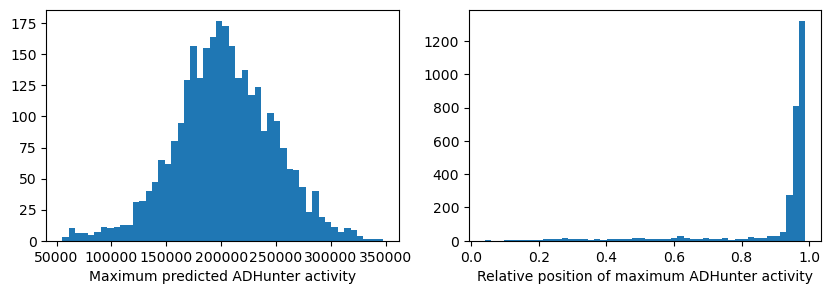

In [266]:
# Visualize location and distribution of maximum activities
fig, axs = plt.subplots(1,2,figsize=(10,3))
axs[0].hist(predictions["max_adhunter_pred"], bins=50)
axs[0].set_xlabel("Maximum predicted ADHunter activity")

axs[1].hist(predictions["max_adhunter_center"]/predictions["Length"], bins=50)
axs[1].set_xlabel("Relative position of maximum ADHunter activity")

Text(0.5, 0, 'Relative position of maximum ADHunter activity')

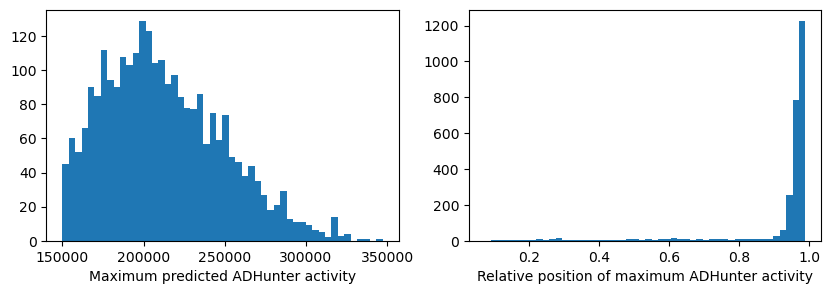

In [267]:
# Visualize location and distribution of maximum activities for only the active sequences
fig, axs = plt.subplots(1,2,figsize=(10,3))
axs[0].hist(predictions[predictions["max_adhunter_pred"] > 150000]["max_adhunter_pred"], bins=50)
axs[0].set_xlabel("Maximum predicted ADHunter activity")

axs[1].hist(predictions[predictions["max_adhunter_pred"] > 150000]["max_adhunter_center"]/predictions["Length"], bins=50)
axs[1].set_xlabel("Relative position of maximum ADHunter activity")

In [268]:
# Code to get a 70aa region around the maximum predicted ADHunter activity
def get_high_activity_region(sequence, max_center):

    # If the max activity is 35aa or more away from both ends
    if (len(sequence) >= max_center + 35) & (max_center - 35 >= 0):
        region = sequence[max_center - 35 : max_center + 35]

    # If the max activity is close to the end
    elif (len(sequence) < max_center + 35):
        region = sequence[len(sequence)-70:]

    # If the max activity is close to the beginning
    else:
        region = sequence[:70]
    return region

In [269]:
# Extract AD regions for all sequences
predictions["AD_region"] = [get_high_activity_region(predictions.loc[i, "sequence"], int(predictions.loc[i, "max_adhunter_center"])) for i in predictions.index]

In [270]:
# Merge ADHunter predictions with filtered df
predictions_w_names = dna_binding_domain_blast.merge(predictions.drop_duplicates("sequence"), left_on="aa_seq", right_on="sequence")
predictions_w_names

,name,aa_seq,Length_x,gene,species,evalue_x,scores,Query,Hit type,PSSM-ID,...,end_of_align_subj,evalue_y,bitscore,sequence,adhunter_centers,adhunter_preds,Length_y,max_adhunter_pred,max_adhunter_center,AD_region
0,g001087.m1_yHMPu5000034874_tetrapisispora_blat...,MSNQPMEGDIGDSNDNDSNSTISATTTSGVDTPGNSSLTSTNTNRN...,1435,g001087.m1,yHMPu5000034874_tetrapisispora_blattae_190924....,0.0,1389.0,Q#1 - >g001087.m1_yHMPu5000034874_tetrapisispo...,specific,238023,...,943,3.240000e-171,535.0,MSNQPMEGDIGDSNDNDSNSTISATTTSGVDTPGNSSLTSTNTNRN...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[20524.2109375, 19753.97265625, 19055.1484375,...",1435,234574.50000,1412.0,QNRNLTNPNPNDFNNVLPLYVQSNLSSSMNPSPSTSADNLNEYLTD...
1,g001268.m1_saccharomyces_cerevisiae.final,MDTQIAITGVAVGKEINNDNSKTDQKVSLPKADVPCIDKATQTIIE...,944,g001268.m1,saccharomyces_cerevisiae.final,0.0,1275.3,Q#2 - >g001268.m1_saccharomyces_cerevisiae.final,specific,214501,...,944,0.000000e+00,1955.0,MDTQIAITGVAVGKEINNDNSKTDQKVSLPKADVPCIDKATQTIIE...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[30748.0078125, 36812.70703125, 33882.1796875,...",944,208232.03125,924.0,HRESMTGTTLLPPPFISNDVTNSADSTNIKPSPSSSVDNLNDYLTD...
2,g001213.m1_saccharomyces_kudriavzevii.final,MNIQFAAAGGTIGKEVNGSSKADEEMSLPKADEPYIDKATQTIIEG...,939,g001213.m1,saccharomyces_kudriavzevii.final,0.0,1271.6,Q#3 - >g001213.m1_saccharomyces_kudriavzevii.f...,specific,214501,...,944,0.000000e+00,1630.0,MNIQFAAAGGTIGKEVNGSSKADEEMSLPKADEPYIDKATQTIIEG...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[22253.29296875, 20349.80078125, 25904.9414062...",939,208232.03125,919.0,RESLTGSIPLHPPFISNSKVTNSTDSTNMKPSPSSSVDNLNDYLTD...
3,g001221.m1_saccharomyces_mikatae.final,MDTQIGITGAAIEKEINGISEADKNIASPKADDPYVDKATQTIIEG...,944,g001221.m1,saccharomyces_mikatae.final,0.0,1270.5,Q#4 - >g001221.m1_saccharomyces_mikatae.final,specific,214501,...,944,0.000000e+00,1655.0,MDTQIGITGAAIEKEINGISEADKNIASPKADDPYVDKATQTIIEG...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[24967.0703125, 24770.34375, 29924.078125, 325...",944,208232.03125,924.0,QEGLAGSTLLPPPFIANGNMTNSTDSTNMKPSPSSSVDNLNDYLTD...
4,g001238.m1_saccharomyces_paradoxus.final,MDTQIAITGTAIGKEINKSSSKTDNKIASSNADVPCIDKATQTIIE...,944,g001238.m1,saccharomyces_paradoxus.final,0.0,1268.3,Q#5 - >g001238.m1_saccharomyces_paradoxus.final,specific,214501,...,944,0.000000e+00,1785.0,MDTQIAITGTAIGKEINKSSSKTDNKIASSNADVPCIDKATQTIIE...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[33075.91015625, 40029.7109375, 36286.34765625...",944,208232.03125,924.0,QREGLVGSTLLPPPFISNGMTNSTDSTNMKPSPSSSVDNLNDYLTD...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1078,g001145.m1_yHMPu5000034741_lipomyces_tetraspor...,MDRIAPSSAGTPAPYGHSCATCAKSKRKCIVRRSGEPCERCYKTNK...,588,g001145.m1,yHMPu5000034741_lipomyces_tetrasporus_170307.f...,0.00012,28.9,Q#429 - >g001145.m1_yHMPu5000034741_lipomyces_...,specific,238023,...,550,1.000000e-03,40.0,MDRIAPSSAGTPAPYGHSCATCAKSKRKCIVRRSGEPCERCYKTNK...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[25285.96875, 29639.67578125, 41513.53515625, ...",588,293203.59375,568.0,RDSAEGDVFSRSAQIFRSLRSEWEAKLGLDDMMSSMIPPSQNASDI...
1079,g006619.m1_yHMPu5000034744_lipomyces_spencer-m...,MDRSAPSSAGTPAPYGHSCATCAQSKRKCIVRRSGEPCERCYKTNK...,592,g006619.m1,yHMPu5000034744_lipomyces_spencer-martinsiae_1...,0.00014,28.7,Q#466 - >g006619.m1_yHMPu5000034744_lipomyces_...,specific,238023,...,477,5.000000e-03,37.7,MDRSAPSSAGTPAPYGHSCATCAQSKRKCIVRRSGEPCERCYKTNK...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[24562.7421875, 28532.15234375, 39596.9453125,...",592,303802.81250,569.0,EGDVFSRSAQMFRSLRSEWEAKLGLDDMMSSIIPPSQNASDIAFPD...
1080,g003872.m1_yHMPu5000041825_debaryomyces_robert...,MSYDAGQSLKQQSSYVPSGKRKLTEDDSDDDIPTSSKNRRLAQTSR...,699,g003872.m1,yHMPu5000041825_debaryomyces_robertsiae_170307...,0.00015,28.6,Q#479 - >g003872.m1_yHMPu5000041825_debaryomyc...,specific,214501,...,116,2.760000e-04,42.0,MSYDAGQSLKQQSSYVPSGKRKLTEDDSDDDIPTSSKNRRLA

In [271]:
# Merge ADHunter predictions with filtered df
with open("../War1/War1_blast_filtered_ADregions.fasta", "w+") as f:
    for i in predictions_w_names.index:
        f.write(">" + predictions_w_names.loc[i, "gene_species_name"] + "\n")
        f.write(predictions_w_names.loc[i, "AD_region"] + "\n")

In [272]:
# Colors for the alignment conservation plots
amino_acid_colors = {
    # Purples
    'F': '#FFA442',  
    'W': '#006CAF',
    'L': '#5B2B82',

    # Reds
    'D': '#E03839', 
    'E': '#FDA0A5', 

    # Blues
    'K': '#00B3E5',  # Deep sky blue
    'R': '#00B3E5',  # Blue 

    # black
    'S': '#000000',  # Gainsboro
    'P': '#000000',  # Dim grey

    # greys
    'A': '#787878',  # Lime green
    'V': '#787878',  # Light green
    'I': '#787878',  # Sea green
    'M': '#787878',  # Olive drab
    'T': '#787878',  # Silver
    'G': '#787878',  # Slate grey
    'C': '#787878',  # Burly wood
    'N': '#787878',  # Wheat
    'Q': '#787878',  # Tan
    'H': '#787878',  
    'Y': '#787878', 
    '-': "#FFFFFF"
}

In [273]:
# Code to make alignment conservation plots
def make_alignment_conservation_plot(alignment_file, output_file, remove_gaps=False):
    with open(alignment_file, "r") as f:
        lines = f.readlines()

    names = []
    seqs = []
    seq = ""

    for line in lines:
        if line.startswith(">"):
            names.append(line.strip().replace(">",""))
            if len(seq) > 0:
                seqs.append(seq)
                seq = ""
        else:
            seq += line.strip()

    seqs.append(seq)

    amino_acids = ['Y', 'H', 'Q','N', 'C', 'G', 'T', 'M', 'I', 'V', 'A', 'S',  'P', 'R', 'K', 'D', 'E', 'L', 'W', 'F', '-']

    # Each sequence position gets an dictionary is the list
    amino_acid_dicts = [{aa: 0 for aa in amino_acids}.copy() for _ in range(len(seqs[0]))]

    for seq in seqs: 
        for i, aa in enumerate(seq): 
            amino_acid_dicts[i][aa] += 1
    
    if remove_gaps: 
        filtered_aa_dict = []
        for aa_d in amino_acid_dicts:
            if aa_d['-'] < len(seqs) * .90:
                filtered_aa_dict.append(aa_d)
        amino_acid_dicts = filtered_aa_dict

    from matplotlib.lines import Line2D
    fig, ax = plt.subplots(figsize=(20,3))

    for i, count_dict in enumerate(amino_acid_dicts): 
        bottom = 0
        for aa, count in count_dict.items():
            p = ax.bar(i, count/len(seqs), label=aa, bottom=bottom, color = amino_acid_colors[aa])
            bottom += count/len(seqs)

    ax.set_xlabel("Alignment position")
    ax.set_ylabel("Percent of sequences")

    custom_lines = []

    for color in list(amino_acid_colors.values()):
        custom_lines.append(Line2D([0], [0], color=color, lw=2))

    ax.legend(custom_lines, list(amino_acid_colors.keys()), bbox_to_anchor=(1.05, 1.05), fontsize=5.5)

    plt.savefig(output_file)

In [274]:
! mafft --auto ../War1/War1_blast_filtered_ADregions.fasta > ../War1/War1_blast_filtered_ADregions.mafft

nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8176 kb
rescale = 1
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
 1001 / 1083
done.

Constructing a UPGMA tree (efffree=0) ... 
 1080 / 1083
done.

Progressive alignment 1/2... 
STEP   197 / 1082 
Reallocating..done. *alloclen = 1144
STEP  1001 / 1082  h
done.

Making a distance matrix from msa.. 
 1000 / 1083
done.

Constructing a UPGMA tree (efffree=1) ... 
 1080 / 1083
done.

Progressive alignment 2/2... 
STEP   275 / 1082 
Reallocating..done. *alloclen = 1142
STEP  1001 / 1082  h
done.

disttbfast (aa) Version 7.526
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct)

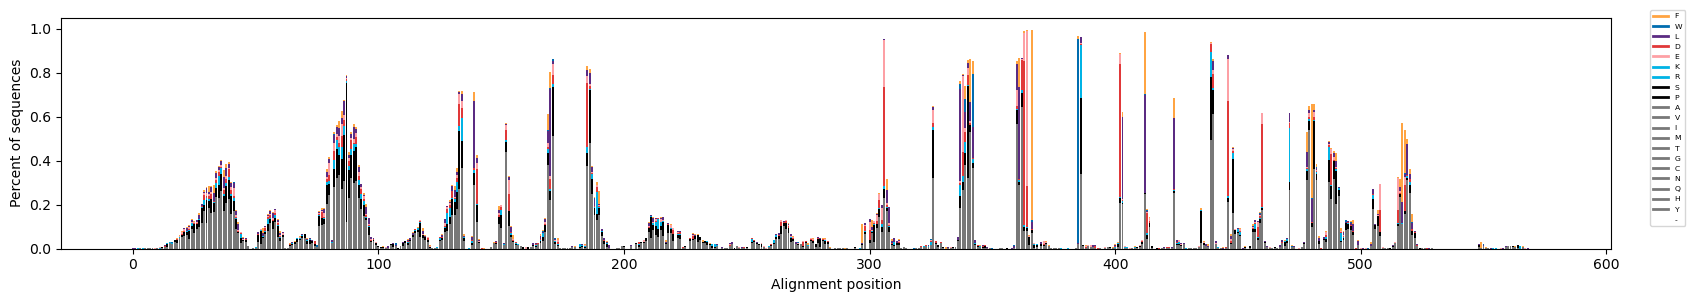

In [275]:
make_alignment_conservation_plot("../War1/War1_blast_filtered_ADregions.mafft", "../War1/War1_ADregions_alignment_conservation_plot.pdf")

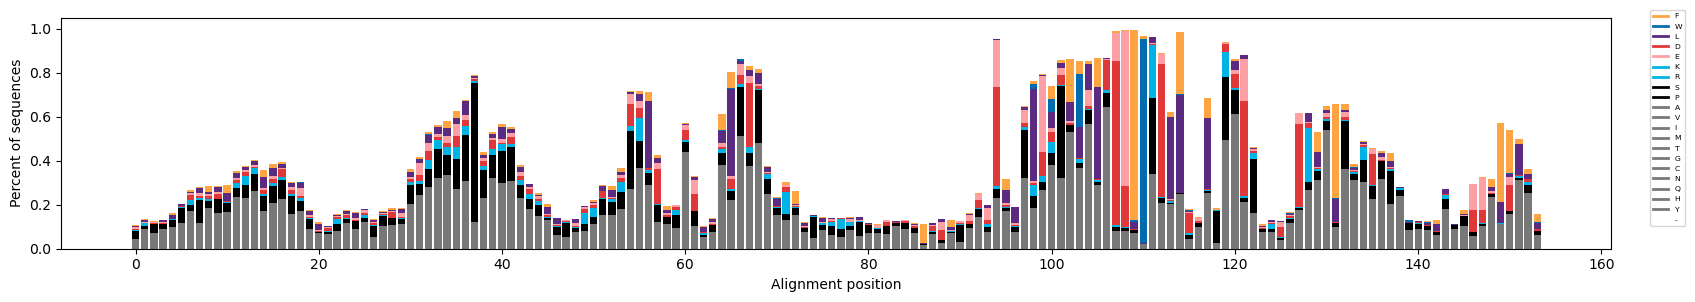

In [276]:
make_alignment_conservation_plot("../War1/War1_blast_filtered_ADregions.mafft", "../War1/War1_ADregions_alignment_conservation_plot_no_gaps.pdf", remove_gaps=True)